# 1St Step
- Import Lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import time
%matplotlib inline

C:\Users\saeed\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# 2nd Step
- load Data
- Select Feature
- check Null
- Dropnull

In [2]:
df = pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# 3Rd Step
- Data Visualization and Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A7C87795F8>]],
      dtype=object)

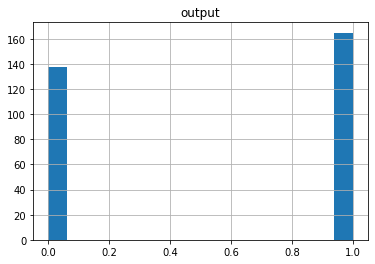

In [6]:
df.hist(column='output', bins=16)

In [7]:
ds=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]

In [8]:
X = ds[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']].values  #.astype(float)
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [10]:
y = ds['output'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


# KNN with K=1,3,5 with Holdout


In [12]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.7704918032786885


In [15]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n ,metric='minkowski', p=2).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7704918 , 0.7704918 , 0.80327869, 0.80327869, 0.80327869,
       0.81967213, 0.83606557, 0.81967213, 0.81967213])

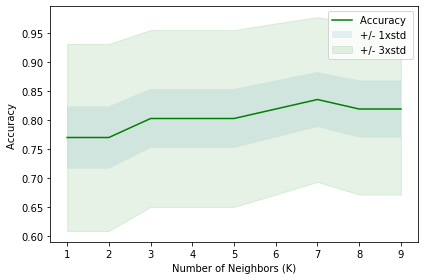

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8360655737704918 with k= 7


In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
print('Confusion matrix: \n', confusion_matrix(y_test, yhat))

Confusion matrix: 
 [[20  5]
 [ 6 30]]


In [19]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.86      0.83      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.82      0.82      0.82        61



In [20]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [21]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8512396694214877
Test set Accuracy:  0.8360655737704918


In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
print('Confusion matrix: \n', confusion_matrix(y_test, yhat))

Confusion matrix: 
 [[21  4]
 [ 6 30]]


In [24]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.88      0.83      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
DiseaseTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [26]:
DiseaseTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
predTree = DiseaseTree.predict(X_test)

In [28]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 1 1 1]
[1 0 1 1 0]


In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("DecisionTrees's recall: ", metrics.recall_score(y_test, predTree))
print("DecisionTrees's precision: ", metrics.precision_score(y_test, predTree))
print("DecisionTrees's f-1score: ", metrics.f1_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8524590163934426
DecisionTrees's recall:  0.9166666666666666
DecisionTrees's precision:  0.8461538461538461
DecisionTrees's f-1score:  0.8799999999999999


In [30]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



# SVM_RBF

In [31]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\Users\saeed\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
yhatsvm = clf.predict(X_test)
yhatsvm [0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [33]:
print("SVM_RBF's Accuracy: ", metrics.accuracy_score(y_test, yhatsvm))
print("SVM_RBF's recall: ", metrics.recall_score(y_test, yhatsvm))
print("SVM_RBF's precision: ", metrics.precision_score(y_test, yhatsvm))
print("SVM_RBF's f-1score: ", metrics.f1_score(y_test, yhatsvm))

SVM_RBF's Accuracy:  0.8688524590163934
SVM_RBF's recall:  0.8055555555555556
SVM_RBF's precision:  0.9666666666666667
SVM_RBF's f-1score:  0.8787878787878789


In [34]:
print(classification_report(y_test, yhatsvm))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



# SVM_Poly

In [35]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
yhatsvm = clf.predict(X_test)
yhatsvm [0:5]
print("SVM_Poly's Accuracy: ", metrics.accuracy_score(y_test, yhatsvm))
print("SVM_Poly's recall: ", metrics.recall_score(y_test, yhatsvm))
print("SVM_Poly's precision: ", metrics.precision_score(y_test, yhatsvm))
print("SVM_Poly's f-1score: ", metrics.f1_score(y_test, yhatsvm))

SVM_Poly's Accuracy:  0.8032786885245902
SVM_Poly's recall:  0.8333333333333334
SVM_Poly's precision:  0.8333333333333334
SVM_Poly's f-1score:  0.8333333333333334


C:\Users\saeed\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# svm_linear

In [41]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
yhatsvm = clf.predict(X_test)
yhatsvm [0:5]
print("SVM_linear's Accuracy: ", metrics.accuracy_score(y_test, yhatsvm))
print("SVM_linear's recall: ", metrics.recall_score(y_test, yhatsvm))
print("SVM_linear's precision: ", metrics.precision_score(y_test, yhatsvm))
print("SVM_linear's f-1score: ", metrics.f1_score(y_test, yhatsvm))

SVM_linear's Accuracy:  0.9016393442622951
SVM_linear's recall:  0.8888888888888888
SVM_linear's precision:  0.9411764705882353
SVM_linear's f-1score:  0.9142857142857143


# Logistic regresion

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
yhatLR = LR.predict(X_test)
yhatLR

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [38]:
print("LR's Accuracy: ", metrics.accuracy_score(y_test, yhatLR))
print("LR's recall: ", metrics.recall_score(y_test, yhatLR))
print("LR's precision: ", metrics.precision_score(y_test, yhatLR))
print("LR's f-1score: ", metrics.f1_score(y_test, yhatLR))

LR's Accuracy:  0.8852459016393442
LR's recall:  0.9166666666666666
LR's precision:  0.8918918918918919
LR's f-1score:  0.9041095890410958


In [39]:
print(classification_report(y_test, yhatLR))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61

